In [ ]:
import pandas as pd
import librosa
import librosa.display
import statistics
from scipy.ndimage.measurements import variance
from numpy.core.fromnumeric import mean
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn

In [ ]:
pip install seaborn

     |████████████████████████████████| 285 kB 252 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
arr = os.listdir('genres/all')
print(arr)

In [ ]:
import librosa
audio_path = 'genres/all'+'/'+arr[0]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

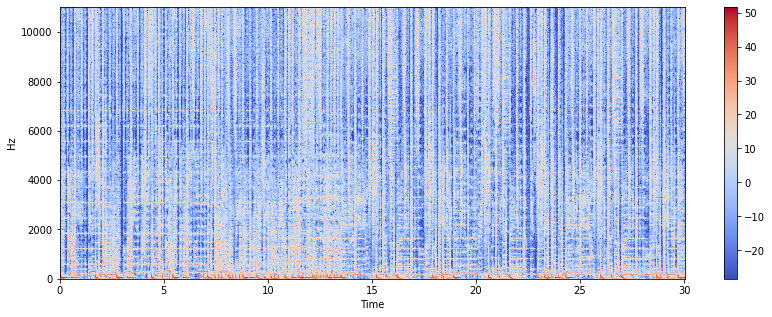

In [ ]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

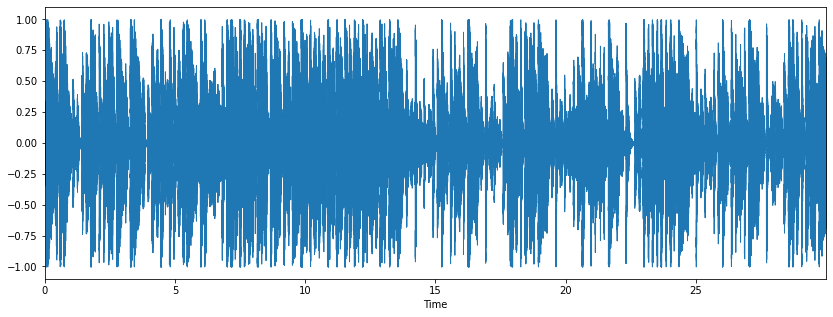

In [ ]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

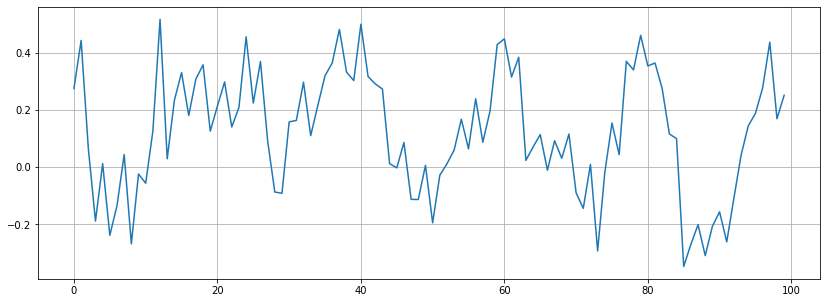

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
def song_name(file):
    lis=[]
    file2='genres/all/'+file
    y, sr = librosa.load(file2,)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    hop_length = 5000
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    rmse = librosa.feature.rms(y=y)
    y_harm, y_perc = librosa.effects.hpss(y=y)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y, pad=False)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    
    lis.append(np.mean(spectral_bandwidth))
    lis.append(np.var(spectral_bandwidth))
    lis.append(np.mean(spectral_centroids))
    lis.append(np.var(spectral_centroids))
    lis.append(tempo)
    lis.append(np.sum(beats))
    lis.append(np.mean(chroma_stft))
    lis.append(np.var(chroma_stft))
    lis.append(np.mean(rmse))
    lis.append(np.var(rmse))
    lis.append(np.mean(cent))
    lis.append(np.var(cent))
    lis.append(np.mean(spec_bw))
    lis.append(np.var(spec_bw))
    lis.append(np.mean(rolloff))
    lis.append(np.var(rolloff))
    lis.append(np.mean(zcr))
    lis.append(np.var(zcr))
    for coefficient in mfcc:
        lis.append(np.mean(coefficient))
        lis.append(np.var(coefficient))
    split_string = file.split(".", 1)
    substring = split_string[0]
    lis.append(np.mean(y_harm))
    lis.append(np.var(y_harm))
    lis.append(np.mean(y_perc))
    lis.append(np.var(y_perc))
    lis.append(substring)
    return lis

In [ ]:
lis2=[]
j=0
for i in arr:
    file=i
    print(j)
    try:
        lis=song_name(file)
        lis2.append(lis)
    except:
        print(i)
    j+=1

In [ ]:
df = pd.DataFrame(lis2, columns = ['spectral_bandwidth_mean', 'spectral_bandwidth_var','spectral_centroids_mean','spectral_centroids_var','tempo', 'beats','chroma_stft_mean','chroma_stft_var','rmse_mean','rmse_var','cent_mean','cent_var','spec_bw_mean','spec_bw_var','rolloff_mean','rolloff_var','zcr_mean','zcr_var','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','harm_mean','harm_var','percp_mean','percp_var','label'])

In [ ]:
df

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,3222.448442,234208.858861,3682.386205,2.140228e+06,89.102909,27875,0.475536,0.099945,0.250078,0.015148,...,71.471207,0.481101,63.351250,-1.791958,93.538330,-1.567315e-06,0.045228,0.000050,0.019454,pop
1,1525.450514,67246.503527,1396.592429,8.712185e+04,117.453835,36090,0.252217,0.090984,0.019732,0.000168,...,177.337219,14.694926,231.495651,11.523016,254.668823,-1.154608e-05,0.000474,-0.000006,0.000020,classical
2,3361.748634,98164.245112,3941.262858,1.351502e+06,103.359375,32084,0.415795,0.090757,0.240792,0.017005,...,62.631397,-5.403533,69.497147,-4.323020,74.966042,-7.774666e-06,0.028181,0.000116,0.031145,pop
3,1754.216082,283554.933422,1503.869486,5.545765e+05,123.046875,39809,0.339819,0.084151,0.046747,0.001542,...,55.707256,-1.991485,50.006485,-3.353826,49.906399,-4.445727e-04,0.001813,-0.000502,0.000754,jazz
4,1913.258610,123441.419116,1886.954809,2.533910e+05,92.285156,26051,0.431658,0.083609,0.175975,0.003569,...,46.263088,-2.127222,47.571033,-1.508367,50.199821,-3.660583e-06,0.014277,-0.000064,0.010393,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2262.593429,93229.077895,2678.321539,4.676829e+05,117.453835,34662,0.500618,0.082188,0.175927,0.005659,...,181.693237,14.656418,202.773300,15.369627,225.773956,6.875749e-05,0.026343,0.000386,0.006491,hiphop
996,1806.873242,126050.582307,1591.292872,3.319340e+05,143.554688,45547,0.340995,0.090884,0.108627,0.002738,...,80.644913,-3.570771,66.350273,-6.707165,68.708389,8.130270e-07,0.009379,-0.000022,0.002496,country
997,2116.458982,42525.919040,2284.243390,2.412197e+05,95.703125,30532,0.428281,0.085193,0.171670,0.005870,...,90.557999,-1.992990,87.970009,-0.736064,77.979248,-8.921643e-06,0.009859,-0.000673,0.013957,hiphop
998,1970.145374,98732.471264,1934.746539,2.500673e+05,112.347147,34936,0.360992,0.087425,0.144382,0.002804,...,45.047028,-1.457679,36.198315,-5.915813,43.543652,3.641537e-06,0.013379,0.000003,0.004392,country


In [ ]:
df.to_csv('df.csv',)

In [ ]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('df.csv',index_col=0)
data

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,3222.448442,234208.858861,3682.386205,2.140228e+06,89.102909,27875,0.475536,0.099945,0.250078,0.015148,...,71.471207,0.481101,63.351250,-1.791958,93.538330,-1.567315e-06,0.045228,0.000050,0.019454,pop
1,1525.450514,67246.503527,1396.592429,8.712185e+04,117.453835,36090,0.252217,0.090984,0.019732,0.000168,...,177.337219,14.694926,231.495651,11.523016,254.668823,-1.154608e-05,0.000474,-0.000006,0.000020,classical
2,3361.748634,98164.245112,3941.262858,1.351502e+06,103.359375,32084,0.415795,0.090757,0.240792,0.017005,...,62.631397,-5.403533,69.497147,-4.323020,74.966042,-7.774666e-06,0.028181,0.000116,0.031145,pop
3,1754.216082,283554.933422,1503.869486,5.545765e+05,123.046875,39809,0.339819,0.084151,0.046747,0.001542,...,55.707256,-1.991485,50.006485,-3.353826,49.906399,-4.445727e-04,0.001813,-0.000502,0.000754,jazz
4,1913.258610,123441.419116,1886.954809,2.533910e+05,92.285156,26051,0.431658,0.083609,0.175975,0.003569,...,46.263088,-2.127222,47.571033,-1.508367,50.199821,-3.660583e-06,0.014277,-0.000064,0.010393,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2262.593429,93229.077895,2678.321539,4.676829e+05,117.453835,34662,0.500618,0.082188,0.175927,0.005659,...,181.693237,14.656418,202.773300,15.369627,225.773956,6.875749e-05,0.026343,0.000386,0.006491,hiphop
996,1806.873242,126050.582307,1591.292872,3.319340e+05,143.554688,45547,0.340995,0.090884,0.108627,0.002738,...,80.644913,-3.570771,66.350273,-6.707165,68.708389,8.130270e-07,0.009379,-0.000022,0.002496,country
997,2116.458982,42525.919040,2284.243390,2.412197e+05,95.703125,30532,0.428281,0.085193,0.171670,0.005870,...,90.557999,-1.992990,87.970009,-0.736064,77.979248,-8.921643e-06,0.009859,-0.000673,0.013957,hiphop
998,1970.145374,98732.471264,1934.746539,2.500673e+05,112.347147,34936,0.360992,0.087425,0.144382,0.002804,...,45.047028,-1.457679,36.198315,-5.915813,43.543652,3.641537e-06,0.013379,0.000003,0.004392,country


spectral_bandwidth_mean    0
spectral_bandwidth_var     0
spectral_centroids_mean    0
spectral_centroids_var     0
tempo                      0
                          ..
harm_mean                  0
harm_var                   0
percp_mean                 0
percp_var                  0
label                      0
Length: 63, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

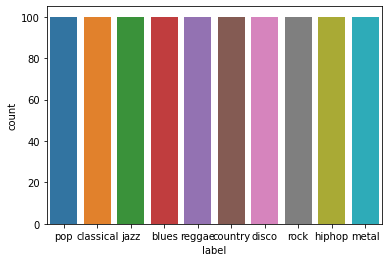

In [ ]:

# null values checking
print(data.isnull().sum())
# checking data distribution is balanced or imbalanced
sns.countplot(x='label',data=data)

In [ ]:
data

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,3222.448442,234208.858861,3682.386205,2.140228e+06,89.102909,27875,0.475536,0.099945,0.250078,0.015148,...,71.471207,0.481101,63.351250,-1.791958,93.538330,-1.567315e-06,0.045228,0.000050,0.019454,pop
1,1525.450514,67246.503527,1396.592429,8.712185e+04,117.453835,36090,0.252217,0.090984,0.019732,0.000168,...,177.337219,14.694926,231.495651,11.523016,254.668823,-1.154608e-05,0.000474,-0.000006,0.000020,classical
2,3361.748634,98164.245112,3941.262858,1.351502e+06,103.359375,32084,0.415795,0.090757,0.240792,0.017005,...,62.631397,-5.403533,69.497147,-4.323020,74.966042,-7.774666e-06,0.028181,0.000116,0.031145,pop
3,1754.216082,283554.933422,1503.869486,5.545765e+05,123.046875,39809,0.339819,0.084151,0.046747,0.001542,...,55.707256,-1.991485,50.006485,-3.353826,49.906399,-4.445727e-04,0.001813,-0.000502,0.000754,jazz
4,1913.258610,123441.419116,1886.954809,2.533910e+05,92.285156,26051,0.431658,0.083609,0.175975,0.003569,...,46.263088,-2.127222,47.571033,-1.508367,50.199821,-3.660583e-06,0.014277,-0.000064,0.010393,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2262.593429,93229.077895,2678.321539,4.676829e+05,117.453835,34662,0.500618,0.082188,0.175927,0.005659,...,181.693237,14.656418,202.773300,15.369627,225.773956,6.875749e-05,0.026343,0.000386,0.006491,hiphop
996,1806.873242,126050.582307,1591.292872,3.319340e+05,143.554688,45547,0.340995,0.090884,0.108627,0.002738,...,80.644913,-3.570771,66.350273,-6.707165,68.708389,8.130270e-07,0.009379,-0.000022,0.002496,country
997,2116.458982,42525.919040,2284.243390,2.412197e+05,95.703125,30532,0.428281,0.085193,0.171670,0.005870,...,90.557999,-1.992990,87.970009,-0.736064,77.979248,-8.921643e-06,0.009859,-0.000673,0.013957,hiphop
998,1970.145374,98732.471264,1934.746539,2.500673e+05,112.347147,34936,0.360992,0.087425,0.144382,0.002804,...,45.047028,-1.457679,36.198315,-5.915813,43.543652,3.641537e-06,0.013379,0.000003,0.004392,country


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder ()
data['label'] =label_encoder.fit_transform (data['label'])

# data shuffling
data=data.sample(frac=1)
col=data.columns
# feature vector
x=data[col[0:len(col)-1]]
#traget
y=data['label']
print(x.head(5))
print(y.head(5))

     spectral_bandwidth_mean  spectral_bandwidth_var  spectral_centroids_mean  \
199              2424.597805           309976.072500              1994.844593   
69               1555.339938           153285.527525              1214.048919   
5                2096.692973           246870.093466              1506.872876   
532              1773.676404            86900.504631              1378.524274   
632              1861.618734            38691.061629              1804.590753   

     spectral_centroids_var       tempo  beats  chroma_stft_mean  \
199           954805.453713  112.347147  32499          0.340910   
69            146505.883956   89.102909  27317          0.309792   
5             414007.098659  129.199219  38534          0.289895   
532           168329.629531   95.703125  25323          0.235529   
632           297896.826331   95.703125  27502          0.329249   

     chroma_stft_var  rmse_mean  rmse_var  ...  mfcc18_mean  mfcc18_var  \
199         0.092920   0.0375

In [ ]:
x.var()

spectral_bandwidth_mean    2.770090e+05
spectral_bandwidth_var     9.303696e+09
spectral_centroids_mean    5.125996e+05
spectral_centroids_var     1.607204e+11
tempo                      7.988636e+02
                               ...     
mfcc20_var                 2.045618e+03
harm_mean                  2.835673e-06
harm_var                   1.357998e-04
percp_mean                 1.170688e-06
percp_var                  4.225423e-05
Length: 62, dtype: float64

In [ ]:
#checking variance among features
x.var()
# removing chroma_stft and rolloff feature as they have very low variance
data=data.drop(['harm_mean','harm_var','percp_mean','percp_var','tempo','mfcc19_mean','beats','spec_bw_var'],axis=1)
data.head(5)

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,cent_mean,cent_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_var,mfcc20_mean,mfcc20_var,label
992,2321.669987,28374.880591,2795.223327,95665.324281,0.491509,0.072141,0.212496,0.000567,2795.223327,95665.324281,...,7.668679,32.542507,-8.689568,25.735662,3.171215,25.679873,26.338881,3.886338,25.471832,6
114,2119.866002,36045.655130,2280.276472,422391.352512,0.314125,0.094759,0.106285,0.000866,2280.276472,422391.352512,...,-1.416738,79.565636,-9.312760,90.814285,5.151316,220.354050,102.834496,-2.437958,109.777428,0
128,2853.565664,105711.703657,3127.019736,931127.279483,0.444449,0.095085,0.166723,0.003059,3127.019736,931127.279483,...,6.209439,50.596550,0.218803,53.101997,4.184300,54.013828,47.306248,5.908604,50.799892,4
632,1861.618734,38691.061629,1804.590753,297896.826331,0.329249,0.094145,0.130096,0.001595,1804.590753,297896.826331,...,-1.862992,86.707733,-0.019071,98.195526,-4.241149,80.778114,100.662308,-5.644223,133.644592,5
947,2878.981441,95177.861882,2898.717713,377421.441623,0.418860,0.080596,0.244199,0.000641,2898.717713,377421.441623,...,4.383713,44.953568,-2.807132,45.408470,2.976282,46.172516,61.663452,-2.365688,62.474205,2


label                      1.000000
spec_bw_mean               0.388800
spectral_bandwidth_mean    0.388800
rolloff_mean               0.385213
spectral_centroids_mean    0.378395
cent_mean                  0.378395
chroma_stft_mean           0.364719
mfcc1_mean                 0.340101
spectral_centroids_var     0.317572
cent_var                   0.317572
rolloff_var                0.273637
zcr_var                    0.272210
zcr_mean                   0.268278
rmse_mean                  0.213968
spectral_bandwidth_var     0.201332
mfcc9_mean                 0.198137
mfcc7_mean                 0.182958
mfcc12_mean                0.153867
mfcc4_var                  0.143586
mfcc11_mean                0.140996
mfcc18_mean                0.119079
mfcc6_var                  0.119034
mfcc10_mean                0.116056
mfcc20_mean                0.113187
mfcc8_mean                 0.108619
rmse_var                   0.107572
mfcc14_mean                0.088560
mfcc7_var                  0

<AxesSubplot:>

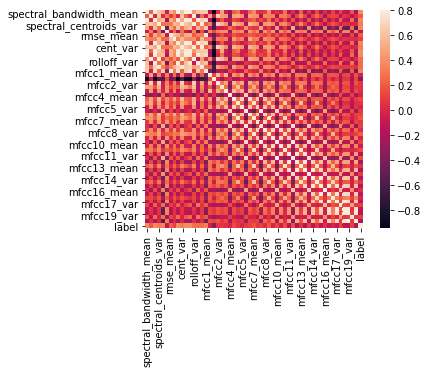

In [ ]:

correlation=data.corr()
print(correlation['label'].sort_values(ascending=False),'\n')
sns.heatmap(correlation,square=True,vmax=0.8)


In [ ]:
#outlier detection
print(data.describe())
col=data.columns

min_threshold,max_threshold=data['spectral_bandwidth_var'].quantile([0.001,0.999])
data=data[(data.spectral_bandwidth_var<max_threshold) & (data.spectral_bandwidth_var>min_threshold)]
min_threshold,max_threshold=data['mfcc17_var'].quantile([0.001,0.999])
data=data[(data.mfcc17_var<max_threshold) & (data.mfcc17_var>min_threshold)]
min_threshold,max_threshold=data['mfcc18_var'].quantile([0.001,0.999])
data=data[(data.mfcc18_var<max_threshold) & (data.mfcc18_var>min_threshold)]
min_threshold,max_threshold=data['mfcc20_var'].quantile([0.001,0.999])
data=data[(data.mfcc20_var<max_threshold) & (data.mfcc20_var>min_threshold)]
min_threshold,max_threshold=data['mfcc19_var'].quantile([0.001,0.999])
data=data[(data.mfcc19_var<max_threshold) & (data.mfcc19_var>min_threshold)]
min_threshold,max_threshold=data['mfcc20_mean'].quantile([0.001,0.999])
data=data[(data.mfcc20_mean<max_threshold) & (data.mfcc20_mean>min_threshold)]


print(data.shape)
x=data[col[0:len(col)-1]]
x.head(5)
y=data['label']

       spectral_bandwidth_mean  spectral_bandwidth_var  \
count              1000.000000             1000.000000   
mean               2242.541070           137079.155165   
std                 526.316473            96455.666326   
min                 898.066208            10787.185064   
25%                1907.240605            67376.554428   
50%                2221.392843           111977.548036   
75%                2578.469836           182371.576801   
max                3509.646417           694784.811549   

       spectral_centroids_mean  spectral_centroids_var  chroma_stft_mean  \
count              1000.000000            1.000000e+03       1000.000000   
mean               2201.780898            4.696916e+05          0.379483   
std                 715.960600            4.008995e+05          0.081833   
min                 570.040355            7.911251e+03          0.168366   
25%                1627.697311            1.843505e+05          0.320984   
50%                22

In [ ]:
col=data.columns
x=data[col[0:len(col)-1]]
x.head(5)

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,cent_mean,cent_var,...,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_var,mfcc20_mean,mfcc20_var
992,2321.669987,28374.880591,2795.223327,95665.324281,0.491509,0.072141,0.212496,0.000567,2795.223327,95665.324281,...,34.425137,7.668679,32.542507,-8.689568,25.735662,3.171215,25.679873,26.338881,3.886338,25.471832
114,2119.866002,36045.655130,2280.276472,422391.352512,0.314125,0.094759,0.106285,0.000866,2280.276472,422391.352512,...,70.884338,-1.416738,79.565636,-9.312760,90.814285,5.151316,220.354050,102.834496,-2.437958,109.777428
128,2853.565664,105711.703657,3127.019736,931127.279483,0.444449,0.095085,0.166723,0.003059,3127.019736,931127.279483,...,42.612194,6.209439,50.596550,0.218803,53.101997,4.184300,54.013828,47.306248,5.908604,50.799892
632,1861.618734,38691.061629,1804.590753,297896.826331,0.329249,0.094145,0.130096,0.001595,1804.590753,297896.826331,...,84.609520,-1.862992,86.707733,-0.019071,98.195526,-4.241149,80.778114,100.662308,-5.644223,133.644592
947,2878.981441,95177.861882,2898.717713,377421.441623,0.418860,0.080596,0.244199,0.000641,2898.717713,377421.441623,...,38.390179,4.383713,44.953568,-2.807132,45.408470,2.976282,46.172516,61.663452,-2.365688,62.474205


In [ ]:

#normalising the feature vectors

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(np_scaled, columns = x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from  sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[3,4,5,6,7],'weights': ["uniform","distance"],
                     'algorithm' : ["auto", "ball_tree", "kd_tree", "brute"],'p':[1,2],'leaf_size':[25,30,35,40]}
                   ]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy')
clf.fit(X, y)


print("Best parameters set found on development set:\n")
print(clf.best_params_)

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [ ]:
dfknn = pd.DataFrame(clf.cv_results_)
dfknn.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
149,0.003618,0.000401,0.013357,0.002115,ball_tree,40,5,1,distance,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n...",0.671717,0.671717,0.717172,0.690355,0.741117,0.698416,0.027077,1
169,0.003924,0.000015,0.015774,0.000333,kd_tree,25,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 25, 'n_n...",0.671717,0.671717,0.717172,0.690355,0.741117,0.698416,0.027077,1
49,0.003920,0.000365,0.015440,0.000050,auto,35,5,1,distance,"{'algorithm': 'auto', 'leaf_size': 35, 'n_neig...",0.671717,0.671717,0.717172,0.690355,0.741117,0.698416,0.027077,1
229,0.003892,0.000066,0.015612,0.000099,kd_tree,40,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...",0.671717,0.671717,0.717172,0.690355,0.741117,0.698416,0.027077,1
209,0.003943,0.000085,0.015556,0.000092,kd_tree,35,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 35, 'n_n...",0.671717,0.671717,0.717172,0.690355,0.741117,0.698416,0.027077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.003735,0.000020,0.019407,0.000038,auto,30,4,1,uniform,"{'algorithm': 'auto', 'leaf_size': 30, 'n_neig...",0.641414,0.641414,0.696970,0.629442,0.705584,0.662965,0.031703,305
164,0.003919,0.000046,0.019642,0.000129,kd_tree,25,4,1,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 25, 'n_n...",0.641414,0.641414,0.696970,0.629442,0.705584,0.662965,0.031703,305
244,0.003838,0.000045,0.024760,0.001074,brute,25,4,1,uniform,"{'algorithm': 'brute', 'leaf_size': 25, 'n_nei...",0.641414,0.641414,0.696970,0.629442,0.705584,0.662965,0.031703,305
304,0.006663,0.001113,0.040995,0.006273,brute,40,4,1,uniform,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei...",0.641414,0.641414,0.696970,0.629442,0.705584,0.662965,0.031703,305


In [ ]:
knn = KNeighborsClassifier( algorithm='auto', n_neighbors= 5, p= 1, weights= 'distance',leaf_size=25)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

occuracies=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=cv)
print(occuracies.mean())
print(occuracies.std())
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print('Accuracy', 'kNN', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.6734177215189874
0.050569580646678935
Accuracy kNN : 0.67677 



In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'shrinking':[True,False],'decision_function_shape': ["ovr","ovo"],
                     'C': [1,10,20,30],'kernel':['linear']}
                   ]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')
clf.fit(X, y)


print("Best parameters set found on development set:\n")
print(clf.best_params_)

""""
clf = GridSearchCV(model.SVC(gamma='auto'), {
    'C': [1,10,20,30],
    'shrinking': [True,False],
    'decision_function_shape': ["ovr","ovo"]   
    
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
"""

Best parameters set found on development set:

{'C': 30, 'decision_function_shape': 'ovr', 'kernel': 'linear', 'shrinking': True}


'"\nclf = GridSearchCV(model.SVC(gamma=\'auto\'), {\n    \'C\': [1,10,20,30],\n    \'shrinking\': [True,False],\n    \'decision_function_shape\': ["ovr","ovo"]   \n    \n}, cv=5, return_train_score=False)\nclf.fit(X, y)\nclf.cv_results_\n'

In [ ]:
dfsv = pd.DataFrame(clf.cv_results_)
dfsv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036563,0.004338,0.010534,0.001933,1,ovr,linear,True,"{'C': 1, 'decision_function_shape': 'ovr', 'ke...",0.636364,0.676768,0.656566,0.725888,0.756345,0.690386,0.044404,13
1,0.032915,0.001879,0.009351,0.000792,1,ovr,linear,False,"{'C': 1, 'decision_function_shape': 'ovr', 'ke...",0.636364,0.676768,0.656566,0.725888,0.756345,0.690386,0.044404,13
2,0.032061,0.001551,0.009570,0.000939,1,ovo,linear,True,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.636364,0.676768,0.656566,0.725888,0.756345,0.690386,0.044404,13
3,0.035387,0.002890,0.010945,0.000305,1,ovo,linear,False,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.636364,0.676768,0.656566,0.725888,0.756345,0.690386,0.044404,13
4,0.040463,0.002532,0.009315,0.000674,10,ovr,linear,True,"{'C': 10, 'decision_function_shape': 'ovr', 'k...",0.696970,0.656566,0.631313,0.771574,0.700508,0.691386,0.047677,9
5,0.040058,0.001426,0.008421,0.000503,10,ovr,linear,False,"{'C': 10, 'decision_function_shape': 'ovr', 'k...",0.696970,0.656566,0.631313,0.771574,0.700508,0.691386,0.047677,9
6,0.036708,0.004557,0.009021,0.000696,10,ovo,linear,True,"{'C': 10, 'decision_function_shape': 'ovo', 'k...",0.696970,0.656566,0.631313,0.771574,0.700508,0.691386,0.047677,9
7,0.041111,0.001696,0.008342,0.001272,10,ovo,linear,False,"{'C': 10, 'decision_function_shape': 'ovo', 'k...",0.696970,0.656566,0.631313,0.771574,0.700508,0.691386,0.047677,9
8,0.039554,0.003753,0.008369,0.000839,20,ovr,linear,True,"{'C': 20, 'decision_function_shape': 'ovr', 'k...",0.681818,0.666667,0.646465,0.771574,0.695431,0.692391,0.042806,5
9,0.050286,0.002946,0.008672,0.001012,20,ovr,linear,False,"{'C': 20, 'decision_function_shape': 'ovr', 'k...",0.681818,0.666667,0.646465,0.771574,0.695431,0.692391,0.042806,5


In [ ]:
svm = SVC(C= 10, decision_function_shape= "ovr", kernel= 'linear', shrinking= True)
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)

print(occuracies.mean(), occuracies.std())

svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print('Accuracy', 'svm', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.6721518987341772 0.05757754640781853
Accuracy svm : 0.71212 



In [ ]:

from sklearn.neural_network import MLPClassifier
tuned_parameters = [{'hidden_layer_sizes':[(50,75,50), (50,100,50), (100,50)],'activation':["identity", "logistic", "tanh", "relu"], 'solver': ["lbfgs", "sgd", "adam"],
                     'learning_rate' : ["constant", "invscaling", "adaptive"],'alpha': [0.0001, 0.05],'solver': ['sgd', 'adam'],'max_iter':[200,300,400]}
                   ]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, scoring='accuracy')
clf.fit(X, y)


print("Best parameters set found on development set:\n")
print(clf.best_params_)


/home/manish/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manish/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manish/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manish/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/manish/.local/lib/python3.8/site-packages/skle

In [ ]:
dfnn = pd.DataFrame(clf.cv_results_)
dfnn.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
89,3.082187,0.016750,0.006166,0.000107,tanh,0.0001,"(100, 50)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.712121,0.752525,0.737374,0.715736,0.715736,0.726698,0.015709,1
143,1.994333,0.028141,0.004704,0.000079,relu,0.05,"(100, 50)",adaptive,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.717172,0.722222,0.772727,0.715736,0.705584,0.726688,0.023645,2
93,3.724146,0.043152,0.006756,0.000058,tanh,0.05,"(50, 75, 50)",invscaling,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.722222,0.742424,0.737374,0.710660,0.705584,0.723653,0.014408,3
87,3.097671,0.033543,0.006127,0.000118,tanh,0.0001,"(100, 50)",invscaling,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.686869,0.767677,0.707071,0.736041,0.705584,0.720648,0.028288,4
95,3.791724,0.116061,0.006807,0.000114,tanh,0.05,"(50, 75, 50)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.712121,0.722222,0.737374,0.710660,0.705584,0.717592,0.011269,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.248627,0.012901,0.004815,0.000129,relu,0.0001,"(50, 100, 50)",invscaling,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.085859,0.080808,0.111111,0.101523,0.086294,0.093119,0.011359,140
128,0.261757,0.022021,0.004707,0.000054,relu,0.05,"(50, 75, 50)",invscaling,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.035354,0.101010,0.121212,0.086294,0.101523,0.089079,0.029065,141
140,0.233657,0.036552,0.004718,0.000106,relu,0.05,"(100, 50)",invscaling,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.090909,0.101010,0.106061,0.096447,0.050761,0.089038,0.019782,142
122,0.319744,0.085218,0.004583,0.000025,relu,0.0001,"(100, 50)",invscaling,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.080808,0.090909,0.095960,0.065990,0.106599,0.088053,0.013812,143


In [ ]:

nn = MLPClassifier(activation= 'tanh','alpha'= 0.0001, hidden_layer_sizes= (100, 50) 'learning_rate'= adaptive, 'solver': 'adam'})

occuracies=cross_val_score(estimator=nn,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
nn.fit(X_train,y_train)
preds = nn.predict(X_test)
print('Accuracy', 'Neural network', ':', round(accuracy_score(y_test, preds), 5), '\n')
    

0.7 0.04313094946177423
Accuracy Neural network : 0.69697 



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2)
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
dtree_model.fit(X_train, y_train)
preds = dtree_model.predict(X_test)
print('Accuracy', 'Descision tree', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.710126582278481 0.042532399028889736
Accuracy Descision tree : 0.20707 



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X1, y1 = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
clf.fit(X_train,y_train)

preds = clf.predict(X_test)
print('Accuracy', 'Ada Boost:', round(accuracy_score(y_test, preds), 5), '\n')

0.710126582278481 0.042532399028889736
Accuracy Ada Boost: 0.23737 



In [ ]:
from sklearn.svm import SVC
svm = SVC(decision_function_shape="ovr",kernel="linear")
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print('Accuracy', 'svm', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.6645569620253164 0.04572757434984416
Accuracy svm : 0.63131 



In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
occuracies=cross_val_score(estimator=nb,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print('Accuracy', 'Naive bayes', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.08354430379746836 0.02952380706250785
Accuracy Naive bayes : 0.07576 



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
occuracies=cross_val_score(estimator=LDA,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
LDA.fit(X_train, y_train)
preds = LDA.predict(X_test)
print('Accuracy', 'LDA', ':', round(accuracy_score(y_test, preds), 5), '\n')


0.6708860759493671 0.057452180850178315
Accuracy LDA : 0.69192 



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA=QuadraticDiscriminantAnalysis()
occuracies=cross_val_score(estimator=LDA,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
QDA.fit(X_train, y_train)
preds = QDA.predict(X_test)
print('Accuracy', 'QDA', ':', round(accuracy_score(y_test, preds), 5), '\n')



0.6708860759493671 0.057452180850178315
Accuracy QDA : 0.57576 



/home/manish/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X1, y1 = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,random_state=0, shuffle=False)
randomforest = RandomForestClassifier(max_depth=2, random_state=0)
occuracies=cross_val_score(estimator=LDA,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
randomforest.fit(X, y)
preds = randomforest.predict(X_test)
print('Accuracy', 'Random Forest', ':', round(accuracy_score(y_test, preds), 5), '\n')


0.6708860759493671 0.057452180850178315
Accuracy Random Forest : 0.47475 



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K

     |████████████████████████████████| 394.4 MB 8.3 kB/s eta 0:00:013    |███████▉                        | 96.7 MB 7.9 MB/s eta 0:00:38     |██████████████████              | 223.2 MB 9.0 MB/s eta 0:00:20     |███████████████████▏            | 235.6 MB 12.7 MB/s eta 0:00:13     |██████████████████████▊         | 280.4 MB 12.1 MB/s eta 0:00:10
     |████████████████████████████████| 129 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 157 kB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 965 kB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 518 kB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████|

In [ ]:
data1=data
data1

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,cent_mean,cent_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_var,mfcc20_mean,mfcc20_var,label
314,1898.679905,55241.070133,1827.208500,1.553237e+05,0.370490,0.086961,0.242466,0.007511,1827.208500,1.553237e+05,...,0.372080,64.894043,-9.068514,48.603558,-2.030223,44.913216,54.039116,0.028647,49.168674,0
616,1337.900713,91836.301449,1211.613043,1.049455e+05,0.218774,0.085773,0.043809,0.000567,1211.613043,1.049455e+05,...,3.022182,83.280174,-0.395101,68.234612,-2.814562,66.482246,102.173859,1.343888,153.144150,1
228,1058.892383,219831.952123,813.063334,9.294625e+04,0.327437,0.082345,0.059467,0.001298,813.063334,9.294625e+04,...,-1.891770,47.312244,-2.271646,54.591846,3.882905,38.849571,50.033527,-2.221775,56.329365,5
712,1566.362785,96360.240589,1353.683821,1.972749e+05,0.236317,0.095064,0.138080,0.001297,1353.683821,1.972749e+05,...,-2.603281,51.662365,-2.223386,61.099770,-1.952431,109.971855,153.367538,0.767390,172.927338,5
974,1465.863005,50099.086240,1369.490089,1.737615e+05,0.266750,0.086787,0.038912,0.000672,1369.490089,1.737615e+05,...,1.032099,140.206055,1.901313,146.612534,3.714206,133.817230,164.600067,-4.944026,252.886932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1494.645967,165633.668701,1356.154928,2.207655e+05,0.307261,0.081915,0.031510,0.000357,1356.154928,2.207655e+05,...,-1.865786,56.694744,-0.446823,68.714836,1.903680,56.369431,59.007130,-2.804025,50.342319,1
279,2508.008871,330151.599623,2449.056972,1.740847e+06,0.469991,0.097869,0.190863,0.021195,2449.056972,1.740847e+06,...,-0.462213,70.471870,1.656400,64.958321,1.207889,58.765957,47.883755,-2.031405,61.594952,4
605,2760.015269,101239.624028,2485.940908,2.081463e+05,0.415798,0.083373,0.190516,0.000783,2485.940908,2.081463e+05,...,1.210202,24.666534,3.225501,35.964962,2.954098,55.902294,59.871223,1.922456,41.598370,5
874,2234.815307,71784.679866,2706.984946,4.419341e+05,0.413310,0.081602,0.090511,0.000614,2706.984946,4.419341e+05,...,9.937948,86.681244,-5.628077,102.891350,4.790154,81.054710,58.512924,2.964128,57.050911,6


In [ ]:
X

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,cent_mean,cent_var,...,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.545112,0.020957,0.599451,0.033820,0.677769,0.447131,0.637742,0.020327,0.599451,0.033820,...,0.038788,0.801431,0.040868,0.299668,0.042994,0.553337,0.031204,0.036780,0.750768,0.020266
1,0.467839,0.032282,0.460727,0.159738,0.287094,0.806269,0.308716,0.031153,0.460727,0.159738,...,0.128205,0.489764,0.166014,0.277813,0.371397,0.625730,0.896483,0.314629,0.544367,0.211569
2,0.748780,0.135138,0.688834,0.355801,0.574121,0.811443,0.495943,0.110370,0.688834,0.355801,...,0.058867,0.751373,0.088917,0.612073,0.181092,0.590375,0.157142,0.112938,0.816767,0.077740
3,0.368954,0.036188,0.332580,0.111758,0.320403,0.796525,0.382478,0.057480,0.332580,0.111758,...,0.161865,0.474456,0.185022,0.603731,0.408645,0.282338,0.276102,0.306739,0.439727,0.265727
4,0.758512,0.119586,0.627331,0.142407,0.517764,0.581379,0.735951,0.023004,0.627331,0.142407,...,0.048513,0.688743,0.073899,0.505957,0.142268,0.546210,0.122289,0.165087,0.546726,0.104230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.800528,0.311923,0.727375,0.331930,0.656086,0.604152,0.683025,0.299902,0.727375,0.331930,...,0.075574,0.592063,0.083267,0.612422,0.244556,0.508013,0.243344,0.180909,0.801191,0.118800
984,0.312809,0.075741,0.210872,0.031119,0.147475,0.672583,0.135011,0.009652,0.210872,0.031119,...,0.157533,0.651095,0.187245,0.548362,0.212559,0.446837,0.285429,0.263854,0.771445,0.273535
985,0.870341,0.072867,0.814579,0.197944,0.467102,0.496762,0.390057,0.053798,0.814579,0.197944,...,0.050292,0.652422,0.094373,0.710719,0.217391,0.533636,0.219899,0.174128,0.668259,0.091995
986,0.642676,0.617850,0.430770,0.412099,0.391125,0.766895,0.299717,0.083008,0.430770,0.412099,...,0.219442,0.527561,0.148065,0.556257,0.255492,0.543659,0.291695,0.234821,0.606944,0.194034


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import os

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id="1CmI9P9TaD4ELclSoyWYnUOXZvY2DE0yo"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive/MyDrive

In [ ]:
import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Dropout)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
pip install pydub

In [ ]:
genres = 'blues rock metal pop reggae classical disco hiphop country jazz'
genres = genres.split()

In [ ]:

import matplotlib.pyplot as pyplot
import IPython
IPython.display.Audio('/content/drive/MyDrive/MLData/genres/blues/blues.00001.wav')

In [ ]:
from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/MLData/genres',f"{g}")):

    song  =  os.path.join(f'/content/drive/MyDrive/MLData/genres/{g}',f'{filename}')
    j = j+1
    for w in range(0,3):
      i = i+1
      #print(i)
      t1 = 10*(w)*1000
      t2 = 10*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'/content/drive/MyDrive/MLData//audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
pop
hiphop
jazz
metal
reggae
rock


hiphop
jazz


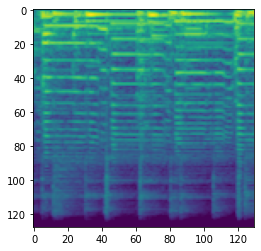

In [ ]:
for g in genres:
  j = 0
  print(g)
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/MLData/audio3sec/',f"{g}")):
    song  =  os.path.join(f'/content/drive/MyDrive/MLData/audio3sec/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/MLData//melspecto/{g}/{g+str(j)}.png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

In [ ]:

directory = "/content/drive/MyDrive/MLData//melspecto"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:20]

  for f in test_files:

    shutil.move(directory + f"{g}"+ "/" + f,"/content/drive/MyDrive/MLData//melspecto/test/" + f"{g}")

In [ ]:

train_dir = "/content/drive/MyDrive/MLData//melspecto"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

validation_dir = "/content/drive/MyDrive/MLData//melspecto/test"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)


In [ ]:
def GenreModel(input_shape = (288,432,4),classes=10):
  np.random.seed(10)
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1),kernel_initializer = glorot_uniform(seed=9))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1),kernel_initializer=glorot_uniform(seed=9))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1),kernel_initializer = glorot_uniform(seed=9))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1),kernel_initializer=glorot_uniform(seed=9))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)

  X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=9))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [ ]:
myypred=[]

In [ ]:
import keras.backend as K

def get_f1(y_true, y_pred):
    #taken from old keras source code
    print(y_pred)

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
model = GenreModel(input_shape=(288,432,4),classes=10)
opt = Adam(learning_rate=0.00005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1])

In [ ]:
model.summary()


In [ ]:

model.fit_generator(train_generator,epochs=20,validation_data=vali_generator)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

In [ ]:
img_data = '/content/drive/MyDrive/MLData//melspecto/'

In [ ]:
BATCH_SIZE=32
TARGET_SIZE=224 
NUM_CLASSES=9

In [ ]:
train_ds = image_dataset_from_directory(
  img_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

In [ ]:
val_ds = image_dataset_from_directory(
  img_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()

In [ ]:
model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
     
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [ ]:
model1.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=30
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  
  verbose=2
)

In [ ]:
plot_hist(history)

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,2644.362516,166313.529886,2539.121009,876112.502768,99.384014,31237,0.476625,0.090673,0.195715,0.010600,...,42.825832,-0.939100,66.891655,-1.083433,76.864410,-0.000155,0.027665,-1.066345e-03,0.008855,reggae
1,1738.858902,58868.399307,1465.857446,143302.098295,73.828125,22129,0.254607,0.087663,0.060560,0.001276,...,160.025467,1.109709,136.810150,2.935806,95.914482,0.000042,0.004387,1.114175e-04,0.000151,jazz
2,2162.799226,67058.366744,2590.650686,256436.829239,123.046875,35641,0.416228,0.080061,0.125366,0.002007,...,45.699696,-4.364861,41.651104,0.195189,45.512283,-0.002376,0.005538,-1.603412e-03,0.007079,disco
3,1050.323423,62123.172997,1064.668667,161084.080653,151.999081,46847,0.268100,0.083873,0.080847,0.000992,...,45.726158,-3.496989,41.440159,-8.645326,73.411758,0.000002,0.006332,4.621446e-07,0.000412,jazz
4,2273.051334,137470.780178,2259.565542,278604.938722,123.046875,38003,0.370284,0.090711,0.113059,0.003015,...,62.320354,0.965605,115.657509,2.690563,74.701248,0.000006,0.004072,1.197979e-04,0.007156,disco
